## **Introduction**
RFM analysis is a powerful techniques used by businesses to segment their customers or  understand them.It leverages three key points ie Recency , Frequency and Monetary value as they say a lot  about  customers behavior

## **steps**
### ***Step 1: Calculate the RFM values***

The RFM values are the recency , frequency and monetary values.

***Recency*** is calculated by subtracting a customers last transaction from the current date.

***Frequency*** is the number of time a unique customer has purchased a product.Its is calculated by grouping the data by  customer id and keeping track of the orderID count for each unique customer.

***Monetary value***is total amount a customer has brought to the business.It's calculated by grouping the data by CostomerID and compounding the price of the product for each order  placed.
You can join the different RFM values based on the customerID.

### ***Step 2 :Calculate RFM scores***

After getting the RFM values its time to calculate their RFM_Scores.You will need to have predefined bins and the [****pd.cut() funtion****](https://pandas.pydata.org/docs/reference/api/pandas.cut.html).

Bins are intervals in which continuous numerical data is to be divided into.Each bin has a certain number of categorical values for which every RFM_value will converted to a certain discrete value.***EXAMPLE*** For every frequency value we can classify it in to one group from a bin like "High-freq , Mid-freq , Low-freq".This provides us with the RFM_Scores which a lable from "[High-freq , Mid-freq , Low-freq]".

Next is to create a new columns in the data set for each of the RFM scores.Make sure to keep track of the dtype .

### <span style="color:blue">NOTE</span>

-1 RFM_Scores is not the same as  RFM_Score

-2 To calculate the RFM_Score , RFM_Scores should numerical.If you used descriptive strings in you bins you can encode them taking in to consideration the weight of each RFM_Scores..

### ***Step 3: RFM_Score segmentation***

First we need to calculate the RFM Score which is gotten by adding all the RFM_scores for every unique customer.

Once you have the RFM_Score its time to segment them.A common method i came accross is the use of "Hig-value ,Mid-value, Low-value" as the list of lables.

we need the [***pd.qcut(data , q , labels = [])***](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) which splits the data into equal sized bins.***data*** is the column containing the **RFM_Score**,***q*** is the number of bins and ***labels***  is a list of labels for each bin.

### ***Step 4: RFM Customer segmentation***

This step involves classifying the customers into different groups based on their RFM_Score.It helps us understand the customers taking into consideration their recency , frequency , and monetary value.Here is an example of groups ***"[high-value customers ,potential opportunities,at-risk customers]"***


<span style="color:blue">***Example***</span>
Customers with: 

**RFM_Score** >= **9** = '**high-value customers**

**RFM_Score** >= **6**  and  **RFM_Score**  < 9 = **potential opportunities**

**RFM_Score** < **6** = **at-risk customers**




In [457]:
## importind needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go


In [448]:
## loadin the data
data = pd.read_csv("rfm_data.csv")


In [449]:
# step 1 Calculate RFM values

### convert the data['PurchaseDate'] to datetime 
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'] )

final_data = data.copy()
## Recency
current_date = dt.now().date()
final_data['Recency'] = (current_date - data['PurchaseDate'].dt.date).dt.days


#Frequency
frequency = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency.rename(columns= {'OrderID': 'Frequency'} , inplace = True)
final_data = pd.merge(final_data, frequency , on = 'CustomerID' , how = 'left')


## monetary value

monetary_data = data.groupby("CustomerID")['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns = {"TransactionAmount": "Monetary_value"} , inplace = True)
final_data = pd.merge(final_data , monetary_data , on = 'CustomerID' , how = 'left' )

In [450]:
## step 2: Calculate RFM_Scores


## by use of numerical labels
rfm_list= (
    ('Recency','Recency_Scores' ,[5, 4, 3, 2, 1]),
    ('Frequency' , 'Frequency_score', [1, 2, 3, 4, 5] ),
    ('Monetary_value','Monetary_Scores' , [1, 2, 3, 4, 5])
)

for detail  in rfm_list:
    # col_name , new_col_name , labels
    col_name , new_col_name , labels = detail
    final_data[new_col_name] = pd.cut(final_data[col_name] , bins = 5 , labels = labels)
    
    ## converting dtype
    final_data[new_col_name] = final_data[new_col_name].astype(int)
    


In [451]:
## you can also use descriptive text as labels
rfm_str = (
    ('Recency','str_Recency_Scores' ,['very-high' , 'high' , 'moderate' , 'low' , 'very-low']),
    ('Frequency' , 'str_Frequency_scores', ['very-low', 'low', 'moderate', 'high', 'very-high'] ),
    ('Monetary_value','str_Monetary_Scores' , ['very-low', 'low', 'moderate', 'high', 'very-high'])
)
for detail  in rfm_str:
    # col_name , new_col_name , labels
    col_name , new_col_name , labels = detail
    final_data[new_col_name] = pd.cut(final_data[col_name] , bins = 5 , labels = labels)
    


def map_back(dataset , map_dict =  {'very-high': 5 , 'high': 4 , 'moderate':3 , 'low' : 2 , 'very-low' : 1} , rfm_str = rfm_str):
    """
    Map descriptive text labels back to numerical scores and update the dataset.

    Parameters:
    - dataset: DataFrame, the input dataset.
    - map_dict: dict, a dictionary mapping descriptive labels to numerical values.

    Returns:
    - DataFrame: the updated dataset with numerical scores.
    """
    for detail in rfm_str:
        print (detail)
        parent_name, target_column ,_   = detail
    
        new_name = f"{parent_name}_Scores"
        dataset[new_name] = final_data[target_column].map(map_dict).astype(int)
        
    return dataset
    


In [452]:
## if you used descriptive text

final_data = map_back(final_data)

('Recency', 'str_Recency_Scores', ['very-high', 'high', 'moderate', 'low', 'very-low'])
('Frequency', 'str_Frequency_scores', ['very-low', 'low', 'moderate', 'high', 'very-high'])
('Monetary_value', 'str_Monetary_Scores', ['very-low', 'low', 'moderate', 'high', 'very-high'])


In [453]:
## Step 3: RFM_Score segmentation

final_data["RFM_Score"] = final_data['Recency_Scores']+ final_data['Frequency_score'] + final_data['Monetary_Scores']

# segment the rfm value

labels = ['Low-rfm' , 'Mid-rfm' , 'High-rfm']

final_data['RFM-segment'] = pd.qcut(final_data['RFM_Score'] , q = 3 , labels = labels)

In [454]:
## step 4: Customer segmentation

final_data['Customer-Segment'] = ''
def update_customer_segment(row):
    value =  row['RFM_Score']
    
    value =int(value)
    if value >= 8:
        return 'high-value customers'
    
    elif  value < 8 and value  >= 6:
        return 'potential opportunities'
    else:
        return 'at-risk customers'
    
    
final_data['Customer-Segment'] = final_data.apply(update_customer_segment, axis=1)

In [458]:
def plot(final_data_1 ,col):
    # RFM Segment Distribution
    segment_counts = final_data_1[col].value_counts().reset_index()
    segment_counts.columns = [f"{col}", 'Count']

    pastel_colors = px.colors.qualitative.Pastel
    print (segment_counts)

    # Create the bar chart
    fig_segment_dist = px.bar(segment_counts, x=f'{col}', y='Count', 
                              color=f'{col}', color_discrete_sequence=pastel_colors,
                              title=f'{col}')

    # Update the layout
    fig_segment_dist.update_layout(xaxis_title=f'{col}',
                                  yaxis_title='Count',
                                  showlegend=False)

    # Show the figure
    fig_segment_dist.show()
    


In [459]:
plot (final_data_1 , 'Customer-Segment')

          Customer-Segment  Count
0        at-risk customers    435
1  potential opportunities    386
2     high-value customers    179


<AxesSubplot:>

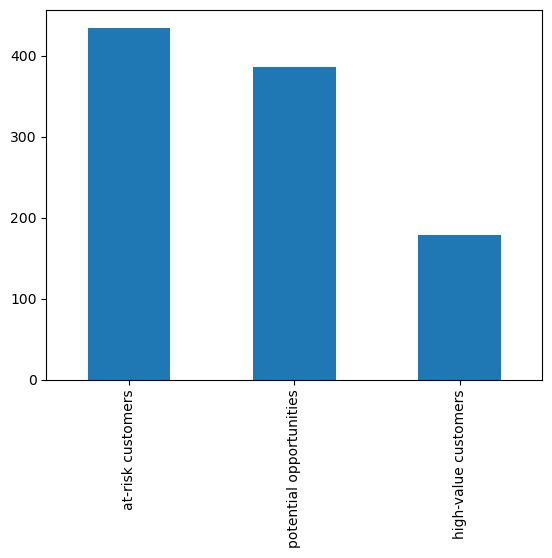

In [460]:
col = 'Customer-Segment'
segment_counts = final_data_1[col].value_counts()


segment_counts.plot(kind = 'bar')



In [439]:
fig_segment_dist = px.bar(segment_counts, x=f'{col}', y='Count', 
                          color=f'{col}', color_discrete_sequence=pastel_colors,
                          title=f'{col}')

# Update the layout
fig_segment_dist.update_layout(xaxis_title=f'{col}',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

In [441]:
print (segment_counts)

          Customer-Segment  Count
0        at-risk customers    435
1  potential opportunities    386
2     high-value customers    179
